In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/politifact-web-scrapped-data/politificat_web_scraped_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2, SelectKBest

from sklearn import metrics
import itertools
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

In [3]:
## LOAD DATASET AND RENAME COLUMNS
data=pd.read_csv('/kaggle/input/politifact-web-scrapped-data/politificat_web_scraped_data.csv', encoding = 'utf-8')
del data['Unnamed: 0']
data=data.rename({"0":"label","1":"text","2":"source"},axis='columns')
data

,label,text,source
0,false,Elderly people were “beat up by a BLM hate gro...,"By Samantha Putterman • September 2, 2020"
1,pants-fire,"“PELOSI says if President TRUMP, she will resi...","By Ciara O'Rourke • September 2, 2020"
2,pants-fire,"""PEDOPHILIA is now LEGAL in CALIFORNIA. Now a ...","By Chris Nichols • September 2, 2020"
3,pants-fire,“Covid-19 means ‘certificate of identification...,"By Ciara O'Rourke • September 2, 2020"
4,mostly-true,“More cops have died from COVID this year than...,"By Jon Greenberg • September 2, 2020"
...,...,...,...
17305,pants-fire,"Obama ""suggested bombing Pakistan.""","By Bill Adair • February 21, 2008"
17306,half-true,The DNC says McCain flip-flopped on whether th...,"By Robert Farley • February 20, 2008"
17307,false,Says the difference between her and Barack Oba...,"By Bill Adair • February 19, 2008"
17308,mostly-true,"""I have 35 years' experience making change.""","By Bill Adair • February 19, 2008"


**PREPROCESSING USING REGEX MODULE**

In [4]:
import re
df1=data['source'].str.extract("( \w\w* \w\w*)")
df1=df1.rename({0:'spoken_by'},axis='columns')
df=pd.concat([data,df1],axis=1)
df

,label,text,source,spoken_by
0,false,Elderly people were “beat up by a BLM hate gro...,"By Samantha Putterman • September 2, 2020",Samantha Putterman
1,pants-fire,"“PELOSI says if President TRUMP, she will resi...","By Ciara O'Rourke • September 2, 2020",Ciara O
2,pants-fire,"""PEDOPHILIA is now LEGAL in CALIFORNIA. Now a ...","By Chris Nichols • September 2, 2020",Chris Nichols
3,pants-fire,“Covid-19 means ‘certificate of identification...,"By Ciara O'Rourke • September 2, 2020",Ciara O
4,mostly-true,“More cops have died from COVID this year than...,"By Jon Greenberg • September 2, 2020",Jon Greenberg
...,...,...,...,...
17305,pants-fire,"Obama ""suggested bombing Pakistan.""","By Bill Adair • February 21, 2008",Bill Adair
17306,half-true,The DNC says McCain flip-flopped on whether th...,"By Robert Farley • February 20, 2008",Robert Farley
17307,false,Says the difference between her and Barack Oba...,"By Bill Adair • February 19, 2008",Bill Adair
17308,mostly-true,"""I have 35 years' experience making change.""","By Bill Adair • February 19, 2008",Bill Adair


In [5]:
del df['source']
df

,label,text,spoken_by
0,false,Elderly people were “beat up by a BLM hate gro...,Samantha Putterman
1,pants-fire,"“PELOSI says if President TRUMP, she will resi...",Ciara O
2,pants-fire,"""PEDOPHILIA is now LEGAL in CALIFORNIA. Now a ...",Chris Nichols
3,pants-fire,“Covid-19 means ‘certificate of identification...,Ciara O
4,mostly-true,“More cops have died from COVID this year than...,Jon Greenberg
...,...,...,...
17305,pants-fire,"Obama ""suggested bombing Pakistan.""",Bill Adair
17306,half-true,The DNC says McCain flip-flopped on whether th...,Robert Farley
17307,false,Says the difference between her and Barack Oba...,Bill Adair
17308,mostly-true,"""I have 35 years' experience making change.""",Bill Adair


In [6]:
df['label'].unique()

array(['false', 'pants-fire', 'mostly-true', 'half-true', 'barely-true',
       'true', 'full-flop', 'half-flip', 'no-flip'], dtype=object)

In [7]:
df['label'].value_counts()

false          3814
half-true      3120
mostly-true    2970
barely-true    2870
true           2228
pants-fire     2060
full-flop       153
half-flip        69
no-flip          26
Name: label, dtype: int64

**DROP UNNECESSARY LABELS EXCEPT TRUE AND FALSE**

In [8]:
df=df[df.label != 'no-flip']
df=df[df.label != 'full-flop']
df=df[df.label != 'half-flip']
df=df[df.label != 'half-true']
df=df[df.label !='barely-true']
df=df[df.label !='mostly-true']
df=df[df.label !='pants-fire']
df

,label,text,spoken_by
0,false,Elderly people were “beat up by a BLM hate gro...,Samantha Putterman
5,false,Says Tony Evers and Mandela Barnes “have parti...,Madeline Heim
6,false,“The entire city (of Portland) is ablaze all t...,Bill McCarthy
8,false,Says Kamala Harris and other Democratic senato...,Noah Y
9,false,"Says video shows Kyle Rittenhouse, the 17-year...",Haley BeMiller
...,...,...,...
17299,false,"""Hillary Clinton believed NAFTA was a 'boon' t...",Bill Adair
17300,false,"""As has been noted by many observers, includin...",Angie Drobnic
17301,true,"""We send a billion dollars to foreign countrie...",Dina Cappiello
17302,true,"He's been endorsed by ""every major newspaper h...",Bill Adair


In [9]:
df['label'].unique()

array(['false', 'true'], dtype=object)

In [10]:
df=df.replace({'label':{'false':'False','true':'True'}})
df=df.reset_index()
df

,index,label,text,spoken_by
0,0,False,Elderly people were “beat up by a BLM hate gro...,Samantha Putterman
1,5,False,Says Tony Evers and Mandela Barnes “have parti...,Madeline Heim
2,6,False,“The entire city (of Portland) is ablaze all t...,Bill McCarthy
3,8,False,Says Kamala Harris and other Democratic senato...,Noah Y
4,9,False,"Says video shows Kyle Rittenhouse, the 17-year...",Haley BeMiller
...,...,...,...,...
6037,17299,False,"""Hillary Clinton believed NAFTA was a 'boon' t...",Bill Adair
6038,17300,False,"""As has been noted by many observers, includin...",Angie Drobnic
6039,17301,True,"""We send a billion dollars to foreign countrie...",Dina Cappiello
6040,17302,True,"He's been endorsed by ""every major newspaper h...",Bill Adair


**PLOTTED LABEL COUNT**

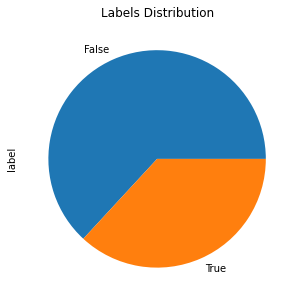

In [11]:
pd.Series(df.label).value_counts().plot(
    kind='pie', title='Labels Distribution', figsize=(5, 5))
plt.show()

In [12]:
a = df.groupby(['label','spoken_by'],as_index=False).count()
df1 = pd.DataFrame(a)
df1

,label,spoken_by,index,text
0,False,Aaron Marshall,7,7
1,False,Aaron Sharockman,73,73
2,False,Adam Thorp,4,4
3,False,Adriel Bettelheim,5,5
4,False,Alan Gathright,7,7
...,...,...,...,...
500,True,Will Van,1,1
501,True,Willoughby Mariano,27,27
502,True,Yanqi Xu,1,1
503,True,Zack McMillin,4,4


**TEXT PREPROCESSING**

In [13]:
stop_words=stopwords.words('english')
snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()
porter=PorterStemmer()

clean_text=[]
for text in df['text']:
    
    clean_text1=text.lower()
    clean_text1=re.sub('[^a-zA-z]',' ',clean_text1)
    clean_text1=word_tokenize(clean_text1)
    clean_text1 = [i for i in clean_text1 if not i in stop_words]
    clean_text1=[wordnet_lemmatizer.lemmatize(word,pos="v") for word in clean_text1]
    clean_text1=" ".join(clean_text1)
    clean_text.append(clean_text1)
    
clean_text

['elderly people beat blm hate group white',
 'say tony evers mandela barnes participate rally do incite calm situation kenosha',
 'entire city portland ablaze time',
 'say kamala harris democratic senators vote let baby scream die bear alive',
 'say video show kyle rittenhouse year old charge kill two protesters kenosha try get away fell violently attack',
 'say authorities find children double wide trailer georgia biggest news story america',
 'say photo show accuse shooter kyle rittenhouse mother arm long gun kenosha wisconsin night two protesters kill one injure',
 'mail ballot sunday show poll station tuesday know already vote friends serious concern us',
 'cuomo end cash bail crime rate go roof',
 'video show police thank kyle rittenhouse give water prior kill',
 'years old kyle rittenhouse perfectly legal able possess rifle without parental supervision',
 'say melania trump first flotus visit troop combat zone since',
 'say joe biden even talk take wall',
 'obama determine socia

In [14]:
df['text1']=clean_text
df

,index,label,text,spoken_by,text1
0,0,False,Elderly people were “beat up by a BLM hate gro...,Samantha Putterman,elderly people beat blm hate group white
1,5,False,Says Tony Evers and Mandela Barnes “have parti...,Madeline Heim,say tony evers mandela barnes participate rall...
2,6,False,“The entire city (of Portland) is ablaze all t...,Bill McCarthy,entire city portland ablaze time
3,8,False,Says Kamala Harris and other Democratic senato...,Noah Y,say kamala harris democratic senators vote let...
4,9,False,"Says video shows Kyle Rittenhouse, the 17-year...",Haley BeMiller,say video show kyle rittenhouse year old charg...
...,...,...,...,...,...
6037,17299,False,"""Hillary Clinton believed NAFTA was a 'boon' t...",Bill Adair,hillary clinton believe nafta boon economy
6038,17300,False,"""As has been noted by many observers, includin...",Angie Drobnic,note many observers include bill clinton forme...
6039,17301,True,"""We send a billion dollars to foreign countrie...",Dina Cappiello,send billion dollars foreign countries every d...
6040,17302,True,"He's been endorsed by ""every major newspaper h...",Bill Adair,endorse every major newspaper state texas


**PLOTTING WORD DISTRIBUTION**

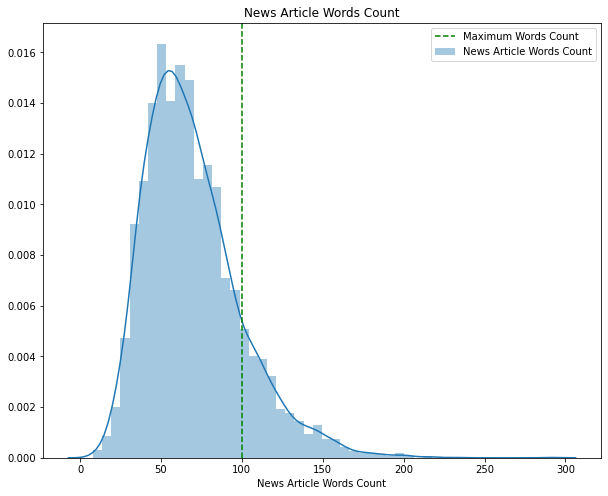

In [15]:
df['length'] = df['text1'].apply(len)
max_word_count = np.round(df['length'].mean() + df['length'].std()).astype(int)
plt.figure(figsize=(10, 8))

sns.distplot(df['length'], hist=True, kde=True,
             label='News Article Words Count')

plt.axvline(x=max_word_count, color='green',
            linestyle='--', label='Maximum Words Count')
plt.title('News Article Words Count')
plt.xlabel('News Article Words Count')
plt.legend()
plt.show()
#df.hist(column='length', by='label', bins=50,figsize=(10,4))

**WORD CLOUD**

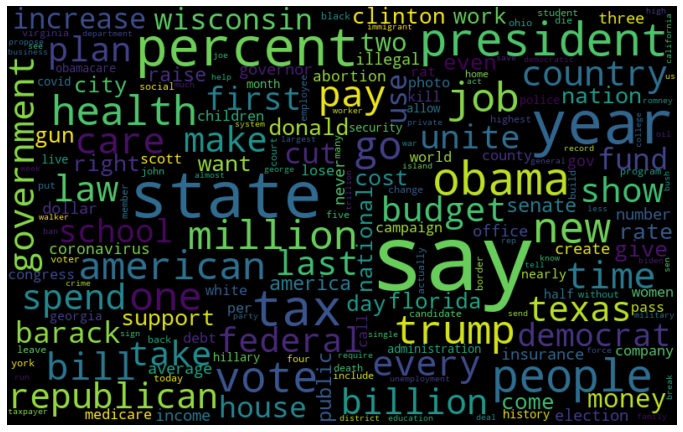

In [16]:
true_word_tokens = pd.Series(df['text1'].tolist()).str.cat(sep=' ')

wordcloud = WordCloud(width= 800, height= 500,
                      max_font_size = 110,
                      collocations = False, background_color='black').generate(true_word_tokens)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**SPLIT IN TRAIN & TEST**

In [17]:
Train_X,Test_X,Train_Y,Test_Y=train_test_split(df['text1'], df['label'], test_size=0.3)

**ENCODE LABELS**

In [18]:
Encoder = LabelEncoder()
encoded_label=Encoder.fit_transform(df['label'])
Train_Y = Encoder.fit_transform( Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
Train_Y

array([1, 1, 0, ..., 0, 1, 0])

**TF-IDF WEIGHTING**

In [19]:
Tfidf_vect = TfidfVectorizer()
Train_X_Tfidf = Tfidf_vect.fit_transform(Train_X).toarray()
Test_X_Tfidf = Tfidf_vect.transform(Test_X).toarray()

**CHI SQUARE TEST(TO CHECK STATISTICAL DEPENDENCE OF FEATURES ON TARGET)**

In [20]:
ch2 = SelectKBest(chi2, k=2500)
x_train_chi2_selected = ch2.fit_transform(Train_X_Tfidf, Train_Y )
x_val_chi2_selected = ch2.transform(Test_X_Tfidf)

**AFTER SORTING,PLOTTED TOP 20 FEATURES**

Text(0, 0.5, 'Features')

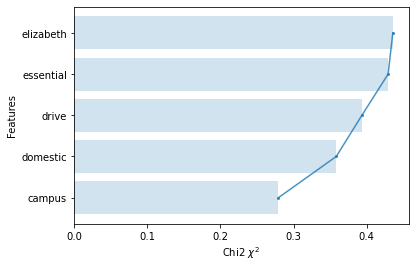

In [29]:
features_chi2scores = zip(Tfidf_vect.get_feature_names(), x_train_chi2_selected[0])
features_chi2scores_sorted = sorted(features_chi2scores, key=lambda x: x[1])
topchi2 = list(zip(*features_chi2scores_sorted[-10:]))
feature_names = topchi2[0]
feature_score = topchi2[1]

features_len = range(len(feature_score))

plt.barh(feature_names,feature_score, align='center', alpha=0.2)
plt.plot(feature_score,feature_names,'-o',markersize=2, alpha=0.8)

plt.xlabel('Chi2 $\chi^2$')
plt.ylabel('Features')

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**LOGISTIC REGRESSION WITH PENALITY**

Accuracy of Logistic Regression on train data is : 75.880822889572
Logistic Accuracy Score on test data ->  70.27027027027027
Confusion matrix, without normalization


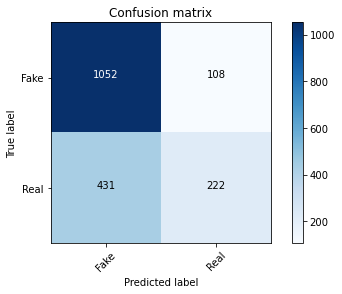

In [23]:
logreg     = LogisticRegression()
logreg_param_grid = [{'penalty':['l1', 'l2']},
                 {'tol':[0.0001, 0.0005, 0.001]}]
grid_log = GridSearchCV(estimator=logreg,
                        param_grid=logreg_param_grid, 
                        scoring='accuracy', cv=5,
                        n_jobs=-1)
best_reg_logreg = grid_log.fit(x_train_chi2_selected, Train_Y).best_estimator_
predictions_log = grid_log.predict(x_val_chi2_selected)

print("Accuracy of Logistic Regression on train data is :", best_reg_logreg.score(x_train_chi2_selected, Train_Y)*100)
print("Logistic Accuracy Score on test data -> ",accuracy_score(predictions_log, Test_Y)*100)
cm = metrics.confusion_matrix(Test_Y, predictions_log)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**PASSIVE AGGRESSIVE CLASSIFIER**

accuracy of Pasive Aggressive Classifier on training data: 91.6055805154883
accuracy of Pasive Aggressive Classifier on test data: 63.21014892443464
Confusion matrix, without normalization


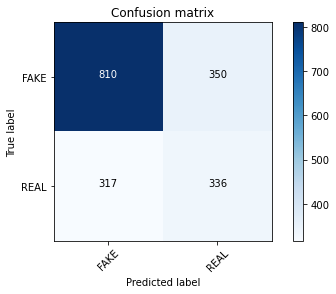

In [24]:
linear_clf = PassiveAggressiveClassifier(max_iter=200)
pac_fit=linear_clf.fit(x_train_chi2_selected, Train_Y)
pred = pac_fit.predict(x_val_chi2_selected)
print("accuracy of Pasive Aggressive Classifier on training data:" , pac_fit.score(x_train_chi2_selected, Train_Y)*100)
print("accuracy of Pasive Aggressive Classifier on test data:", accuracy_score(Test_Y, pred)*100)
plot_confusion_matrix(confusion_matrix(Test_Y, pred), classes=['FAKE', 'REAL'])

**MULTI NOMIAL NAIVE BAYES CLASSIFIER**

/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 64.09266
Alpha: 0.10 Score: 65.63707
Alpha: 0.20 Score: 66.29895
Alpha: 0.30 Score: 66.85052
Alpha: 0.40 Score: 67.12631
Alpha: 0.50 Score: 67.23662
Alpha: 0.60 Score: 67.07115
Alpha: 0.70 Score: 67.45725
Alpha: 0.80 Score: 67.07115
Alpha: 0.90 Score: 66.96084
accuracy of multinomial nave-bayes on test data: 66.96083838940982
Confusion matrix, without normalization


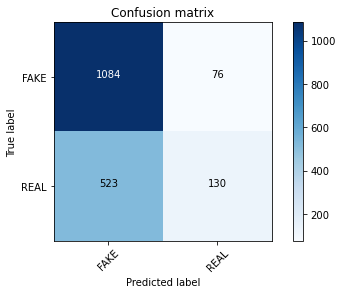

In [25]:
clf = MultinomialNB(alpha=0.1)
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(x_train_chi2_selected, Train_Y)
    pred = nb_classifier.predict(x_val_chi2_selected)
    score = accuracy_score(pred,Test_Y)*100
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

print("accuracy of multinomial nave-bayes on test data:", score)
plot_confusion_matrix(confusion_matrix(Test_Y, pred), classes=['FAKE', 'REAL'])

**DECISION TREE CLASSIFIER**

accuracy of Decision Tree Classifier:  66.68505239933812
Confusion matrix, without normalization


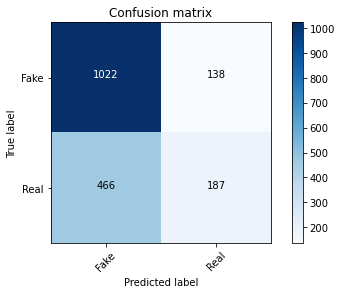

In [26]:
model = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42)

model.fit(x_train_chi2_selected, Train_Y)
pred_dt = model.predict(x_val_chi2_selected)
score = accuracy_score(pred,Test_Y)*100

cm = metrics.confusion_matrix(Test_Y, pred_dt)
print("accuracy of Decision Tree Classifier: ",accuracy_score(pred_dt,Test_Y)*100)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**RANDOM FOREST CLASSIFIER**

accuracy of Rnadom Forest Classifier:  67.3469387755102
Confusion matrix, without normalization


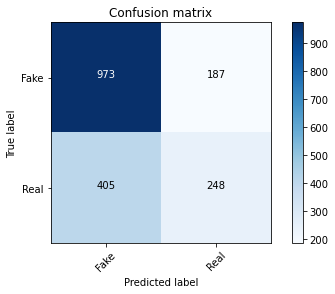

In [27]:
model = RandomForestClassifier(n_estimators=50, criterion="entropy")

model.fit(x_train_chi2_selected, Train_Y)
prediction = model.predict(x_val_chi2_selected)
print("accuracy of Rnadom Forest Classifier: ", accuracy_score(prediction,Test_Y)*100)
cm = metrics.confusion_matrix(Test_Y, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**XGBOOST CLASSIFIER**

accuracy of XGBoost Classifier:  68.94649751792609 2
Confusion matrix, without normalization


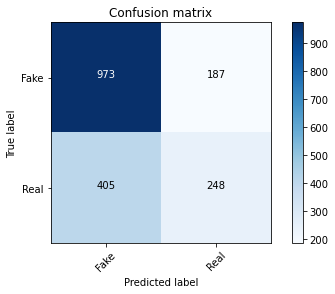

In [28]:
model = XGBClassifier()
import xgboost as xgb
model.fit(x_train_chi2_selected, Train_Y)
pred_xgb=model.predict(x_val_chi2_selected)
print("accuracy of XGBoost Classifier: ",accuracy_score(pred_xgb,Test_Y)*100,2)
cm = metrics.confusion_matrix(Test_Y, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])